In [104]:
l = 0.34
A = 5*l^2
V = 1.5
s = 0.02
k = 0.45
A11 = 2.694e11
A12 = 1.3e47
T11 = 70225/8.314
T12 = 283356/8.314
A21 = 0.5*2.694e11
A22 = 3*1.3e47
T21 = 1.06*T11
T22 = 1.06*T12
C = (0.9*4.14e6 + 0.1*4167460)
c = 3.58e3
m = 400
B1max = 0.15*0.5
B10 = 0.005*0.5
B2max = 0.15*0.5
B20 = 0.005*0.5
Q1b = 1e6
Q2b = 0.9*Q1b
U = 300
var('T', 't', 'B1', 'B2')

(T, t, B1, B2)

In [105]:
mu1(T) = (A11*exp(-T11/T))/(1 + A12*exp(-T12/T))
mu2(T) = 0.4*(A21*exp(-T21/T))/(1 + A22*exp(-T22/T))
Ta(t) = 0.5*(273 + 20 + 273 + 5) + 0.5*(20 - 5)*sin(2*pi*t/24)
dQc(T, t) = -(U*A)*(T - Ta(t))
dQ1b(T, B1, t) = m*Q1b*mu1(T)*B1*(1 - B1/B1max)
dQ2b(T, B2, t) = m*Q2b*mu2(T)*B2*(1 - B2/B2max)
ts = srange(0, 1000, 0.1)

In [106]:
dT = (dQc(T,t) + dQ1b(T,B1,t) + dQ2b(T,B2,t))/(m*c)
dB1 = mu1(T)*B1*(1 - B1/B1max)
dB2 = mu2(T)*B2*(1 - B2/B2max)

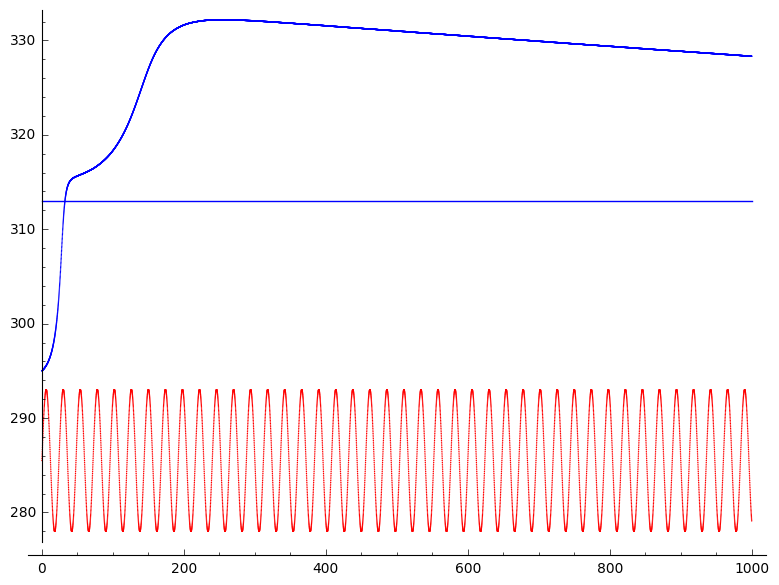

In [107]:
result = desolve_odeint([dT, dB1, dB2], [295, B10, B20], ts, [T,B1,B2], ivar=t)
Ts = result[:,0]
B1s = result[:,1]
B2s = result[:,2]
list_plot(zip(ts,Ts), size = 1) + list_plot(zip(ts, map(Ta, ts)), size = 1, color = 'red') + plot(313, xmin = 0, xmax = 1000)

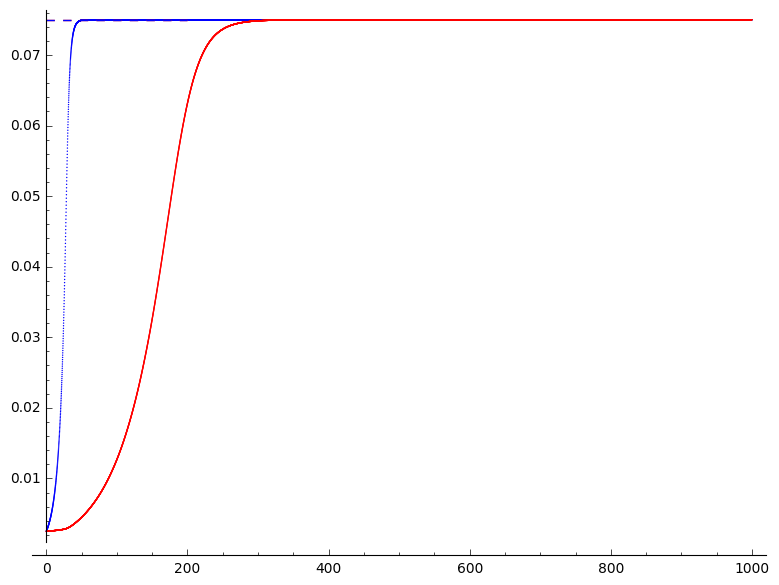

In [84]:
list_plot(zip(ts, B1s), size = 1) \
+ list_plot(zip(ts, B2s), size = 1, color = 'red') \
+ plot(B2max, xmin = 0, xmax = 200, color = 'red', linestyle = '--') \
+ plot(B1max, xmin = 0, xmax = 200, linestyle = '--')

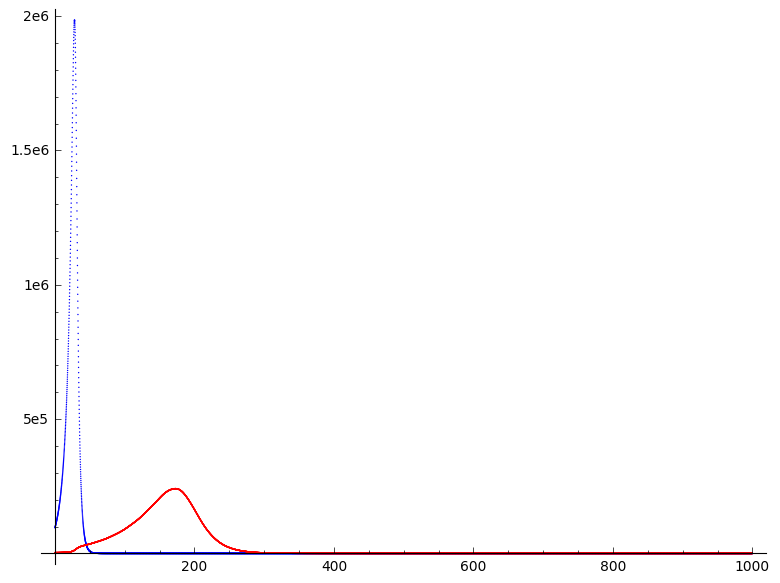

In [85]:
dQ1bs = map(lambda T, B1, t: dQ1b(T, B1, t), Ts, B1s, ts)
dQ2bs = map(lambda T, B2, t: dQ2b(T, B2, t), Ts, B2s, ts)
list_plot(zip(ts, dQ1bs), size = 1) \
+ list_plot(zip(ts, dQ2bs), size = 1, color = 'red')

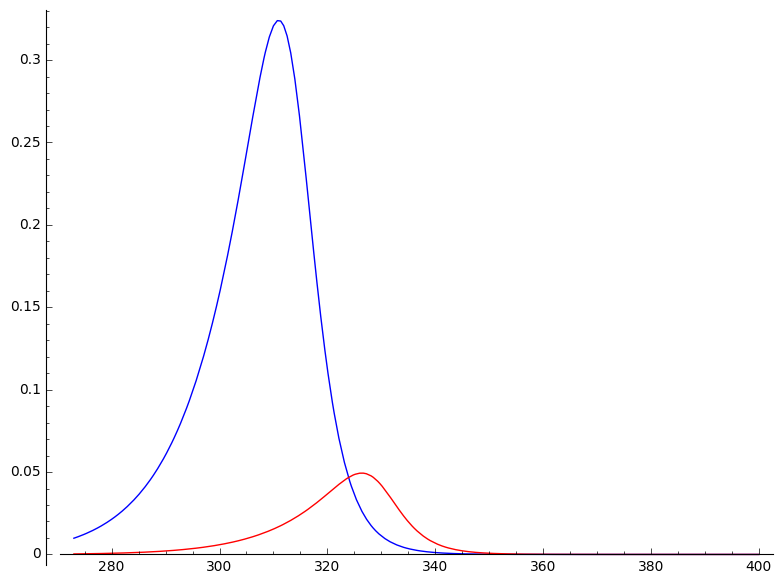

In [86]:
plot(mu1(T), xmin = 273, xmax = 400) \
+ plot(mu2(T), xmin = 273, xmax = 400, color = 'red')

In [101]:
As = srange(1,11,1)
ms = map(lambda A: 500*(sqrt(A/5))^3, As)
ts = srange(0, 1000, 0.1)
sols = []
for x in zip(As,ms):
    mu1(T) = (A11*exp(-T11/T))/(1 + A12*exp(-T12/T))
    mu2(T) = 0.4*(A21*exp(-T21/T))/(1 + A22*exp(-T22/T))
    Ta(t) = 0.5*(273 + 20 + 273 + 5) + 0.5*(20 - 5)*sin(2*pi*t/24)
    dQc(T, t) = -(x[0]*U)*(T - Ta(t))
    dQ1b(T, B1, t) = x[1]*Q1b*mu1(T)*B1*(1 - B1/B1max)
    dQ2b(T, B2, t) = x[1]*Q2b*mu2(T)*B2*(1 - B2/B2max)
    dT = (dQc(T,t) + dQ1b(T,B1,t) + dQ2b(T,B2,t))/(x[1]*c)
    dB1 = mu1(T)*B1*(1 - B1/B1max)
    dB2 = mu2(T)*B2*(1 - B2/B2max)
    sols.append(desolve_odeint([dT, dB1, dB2], [297, B10, B20], ts, [T,B1,B2], ivar=t)[:,0])

In [102]:
grafics = reduce(lambda x,y: x+y, map(lambda punts: list_plot(punts, size = 1), (map(lambda Ts: zip(ts,Ts), sols))))

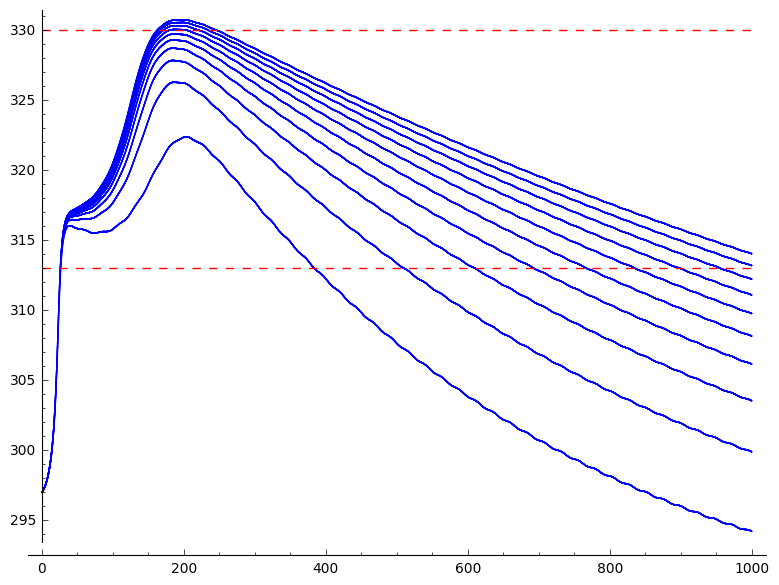

In [103]:
grafics \
+ plot(313, xmin = 0, xmax = 1000, linestyle = '--', color = 'red') \
+ plot(330, xmin = 0, xmax = 1000, linestyle = '--', color = 'red')

In [114]:
As = srange(1,11,1)
ms = map(lambda A: 500*4*(pi/3)*(sqrt(A/(2*pi)))^3, As)
ts = srange(0, 1000, 0.1)
sols = []
for x in zip(As,ms):
    mu1(T) = (A11*exp(-T11/T))/(1 + A12*exp(-T12/T))
    mu2(T) = 0.4*(A21*exp(-T21/T))/(1 + A22*exp(-T22/T))
    Ta(t) = 0.5*(273 + 20 + 273 + 5) + 0.5*(20 - 5)*sin(2*pi*t/24)
    dQc(T, t) = -(x[0]*U)*(T - Ta(t))
    dQ1b(T, B1, t) = x[1]*Q1b*mu1(T)*B1*(1 - B1/B1max)
    dQ2b(T, B2, t) = x[1]*Q2b*mu2(T)*B2*(1 - B2/B2max)
    dT = (dQc(T,t) + dQ1b(T,B1,t) + dQ2b(T,B2,t))/(x[1]*c)
    dB1 = mu1(T)*B1*(1 - B1/B1max)
    dB2 = mu2(T)*B2*(1 - B2/B2max)
    sols.append(desolve_odeint([dT, dB1, dB2], [297, B10, B20], ts, [T,B1,B2], ivar=t)[:,0])

In [115]:
grafics = reduce(lambda x,y: x+y, map(lambda punts: list_plot(punts, size = 1), (map(lambda Ts: zip(ts,Ts), sols))))

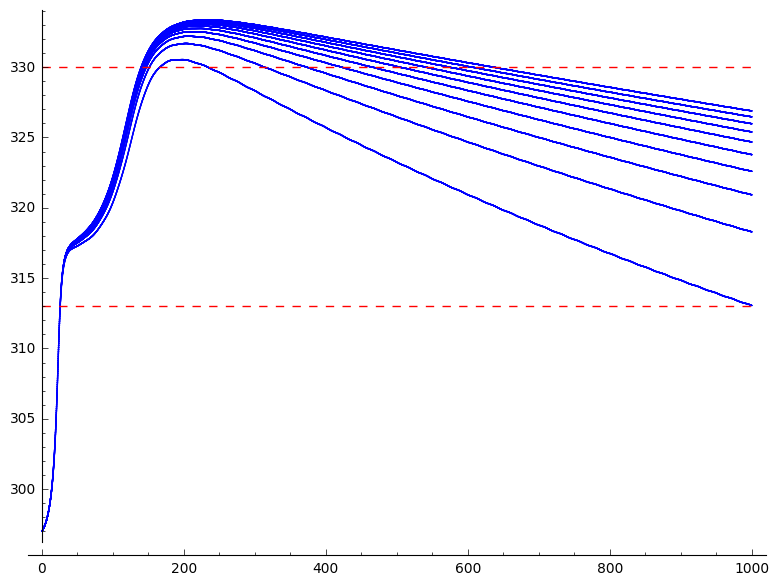

In [116]:
grafics \
+ plot(313, xmin = 0, xmax = 1000, linestyle = '--', color = 'red') \
+ plot(330, xmin = 0, xmax = 1000, linestyle = '--', color = 'red')

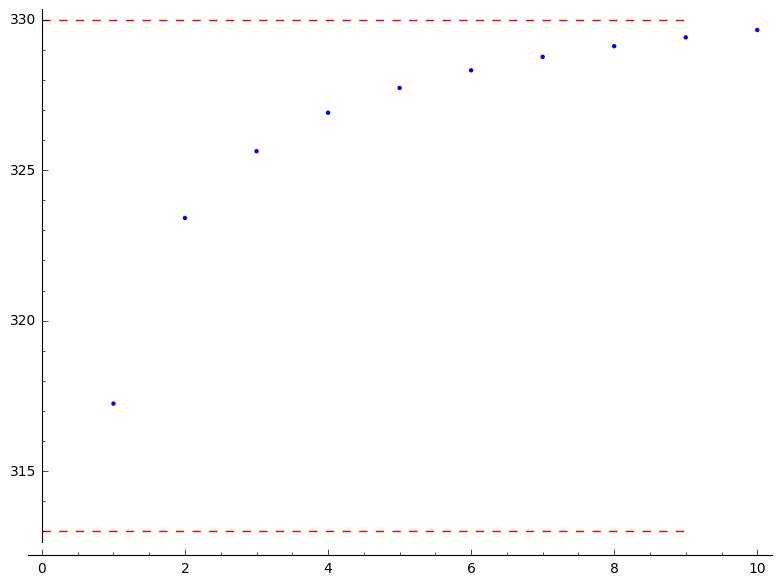

In [52]:
maxTemp = map(lambda Ts: max(Ts), sols)
list_plot(zip(As, maxTemp)) \
+ plot(313, xmin = 0, xmax = 9, linestyle = '--', color = 'red') \
+ plot(330, xmin = 0, xmax = 9, linestyle = '--', color = 'red')

In [90]:
fitx1 = open("2-temperatura.dat", "w")
for x in zip(ts, Ts):
    fitx1.write(str(x[0]) + "\t" + str(x[1] - 273) + "\n")

In [91]:
fitx2 = open("2-mesofils.dat", "w")
for x in zip(ts, B1s):
    fitx2.write(str(x[0]) + "\t" + str(x[1]) + "\n")

In [92]:
fitx3 = open("2-termofils.dat", "w")
for x in zip(ts, B2s):
    fitx3.write(str(x[0]) + "\t" + str(x[1]) + "\n")

In [93]:
fitx4 = open("2-potencies.dat", "w")
for x in zip(ts, dQ1bs, dQ2bs):
    fitx4.write(str(x[0]) + "\t" + str(x[1]) + "\t" + str(x[2]) + "\n")

In [100]:
for i in range(len(sols)):
    fitx = open("2-temperatura-" + str(i) + ".dat", "w")
    for x in zip(ts, sols[i]):
        fitx.write(str(x[0]) + "\t" + str(x[1] - 273) + "\n")

In [117]:
for i in range(len(sols)):
    fitx = open("3-temperatura-" + str(i) + ".dat", "w")
    for x in zip(ts, sols[i]):
        fitx.write(str(x[0]) + "\t" + str(x[1] - 273) + "\n")

In [250]:
for x in zip(ts, dQ1bs, dQ2bs):
    print(str(x[0]) + "\t" + str(x[1]) + "\t" + str(x[2]) + "\n")

0.000000000000000	7168.17728538959	231.718449545953

0.0100000000000000	7175.17686594115	231.739246436029

0.0200000000000000	7182.18382833333	231.760067826850

0.0300000000000000	7189.19818115281	231.780913740615

0.0400000000000000	7196.21993408497	231.801784201983

0.0500000000000000	7203.24909313361	231.822679226587

0.0600000000000000	7210.28566805787	231.843598839037

0.0700000000000000	7217.32966812521	231.864543062960

0.0800000000000000	7224.38110260683	231.885511922001

0.0900000000000000	7231.43998077765	231.906505439812

0.100000000000000	7238.50631191656	231.927523640066

0.110000000000000	7245.58010530604	231.948566546441

0.120000000000000	7252.66137023256	231.969634182636

0.130000000000000	7259.75011598629	231.990726572358

0.140000000000000	7266.84635186131	232.011843739329

0.150000000000000	7273.95008715552	232.032985707286

0.160000000000000	7281.06133115575	232.054152499918

0.170000000000000	7288.18009203694	232.075344136499

0.180000000000000	7295.30637820077	23